In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
file_path = "D:\\Projects\\Forage\\British_Airways\\BA_reviews_cleaned.csv"
df = pd.read_csv(file_path)

In [4]:
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

df["sentiment"] = df["reviews"].apply(get_sentiment)
df["sentiment_category"] = df["sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

In [5]:
print(df["sentiment_category"].value_counts())

sentiment_category
Positive    615
Negative    373
Neutral      12
Name: count, dtype: int64


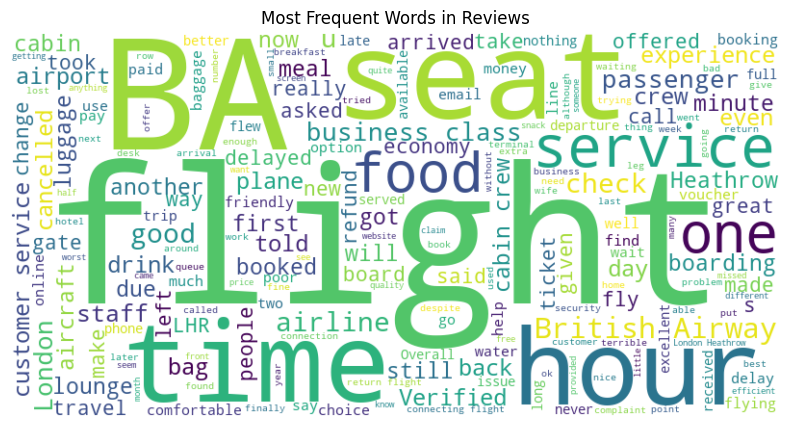

In [6]:
txt = " ".join(df["reviews"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(txt)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()

In [7]:
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(df["reviews"])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [8]:
words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    topics[f"Topic {topic_idx+1}"] = top_words

In [9]:
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: booked, refund, phone, airways, british, service, told, customer, flight, ba
Topic 2: passengers, time, plane, hour, gate, luggage, check, staff, ba, flight
Topic 3: class, cabin, time, seat, service, crew, ba, food, good, flight
Topic 4: booked, day, service, hours, london, airways, british, cancelled, ba, flight
Topic 5: cabin, british, flight, seats, economy, seat, service, business, class, ba
